# **Task-02 : Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

# Exploratory Data Analysis

1. Analysis
*   Univariate Analysis
*   Multivariate Analysis


2. Feature Engineering
*   Creating new columns
*   Modifying existing ones


3. Handling Outliers
*   Detect Outliers
*   Remove outliers








In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Importing the dataset
df = pd.read_csv('/content/train.csv')

In [60]:
# Shape
df.shape

(891, 12)

In [61]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns



*   Survived
*   PClass

*   Sex

*   SibSp

*   Parch
*   Embarked


# Numerical Columns


*   Age
*   Fare
*   Passengerid


# Mixed Columns



*   Name
*   Ticket
*   Cabin
















In [63]:
# Overview of data(Gives missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
# Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Few Conclusions
# 1. Missing values in Age, Cabin and Embarked Columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop.
# 3. Few columns have inappropriate data types

In [65]:
# Dropping cabin columns
df.drop(columns=['Cabin'],inplace=True)

In [66]:
# Inputting missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [67]:
# Inputting missing values for embarked

# Finding the most appeared values in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

# Now all missing data is removed

In [68]:
# Want to check one more thing

# Should i change the SibSp and arch to categories

df['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Changing data type for the following cols


*   Survived(Category)
*   Pclass(Category)

*   Sex(Category)
*   Age(int)

*   Embarked(Category)








In [69]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [71]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62% people died in the accident


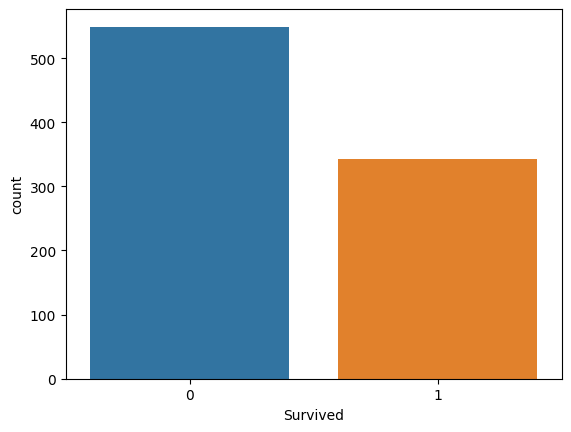

In [72]:
# Univariate Analysis

# Let's start with the Survived Col

sns.countplot(x=df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {}% people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

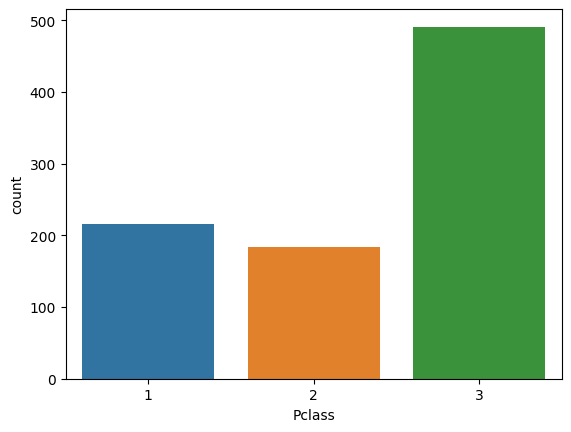

In [73]:
# Pclass columns

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x=df['Pclass'])

# Pclass3 was the most crowded class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

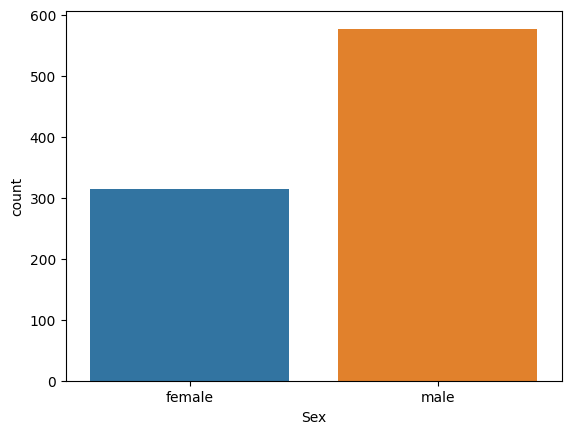

In [74]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x=df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

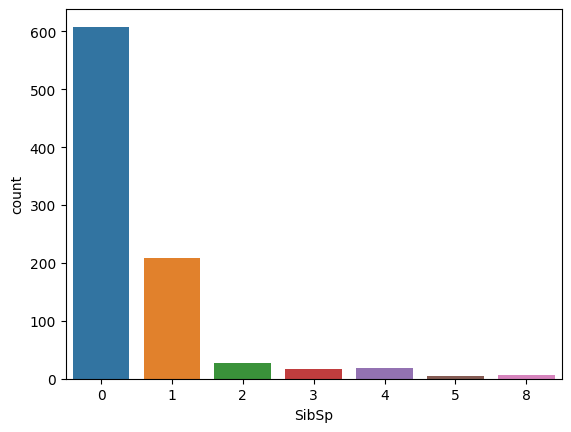

In [75]:
print(df['SibSp'].value_counts())

sns.countplot(x=df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

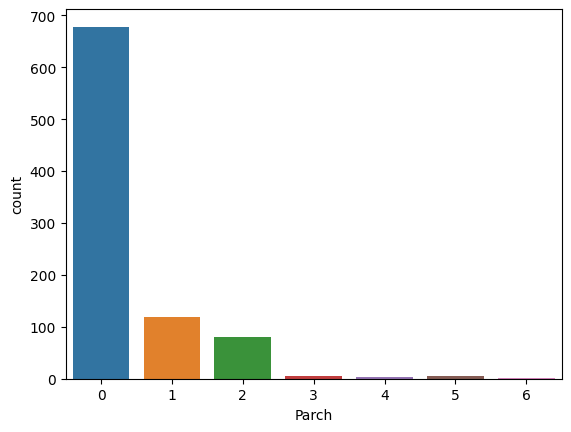

In [76]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x=df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

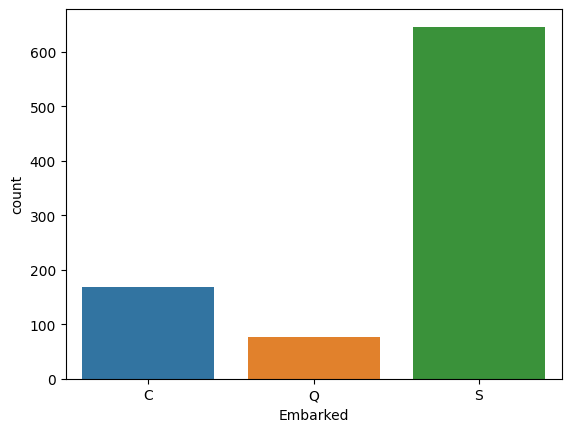

In [77]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x=df['Embarked'])

0.45956263424701577
0.9865867453652877


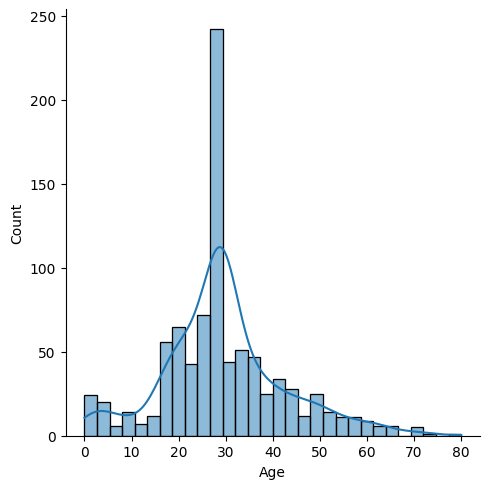

In [78]:
# Age column

sns.displot(df['Age'], kde=True)

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: xlabel='Age'>

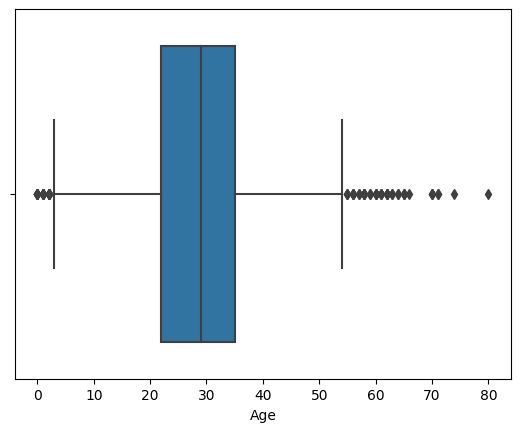

In [79]:
sns.boxplot(x=df['Age'])

In [80]:
# Conclusions i have drawn from this ->

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])




People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


# Conclusion

*   For all ractical uroses age can be considered as normal distribution
*   Deeper analysis is required for outlier detection




<ipython-input-81-3001b72f0dd7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

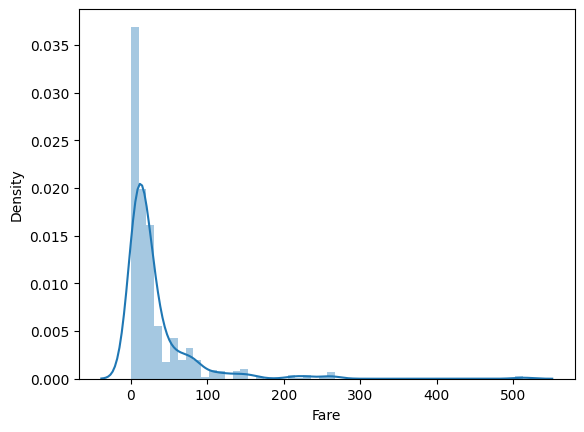

In [81]:
# Fare column

sns.distplot(df['Fare'])


In [82]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: xlabel='Fare'>

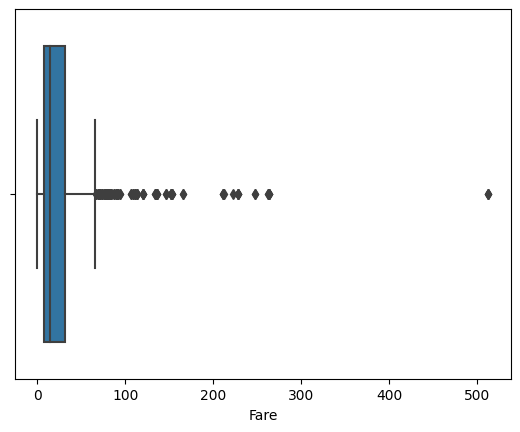

In [83]:
sns.boxplot(x=df['Fare'])

In [84]:
print("People with fare in between $200 and $300 are",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300 are",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 are 17
People with fare in greater than $300 are 3


# Conclusion


*   Highly skewed data, a lot of people had cheaper tickets.
*   Outliers are there in the data



Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


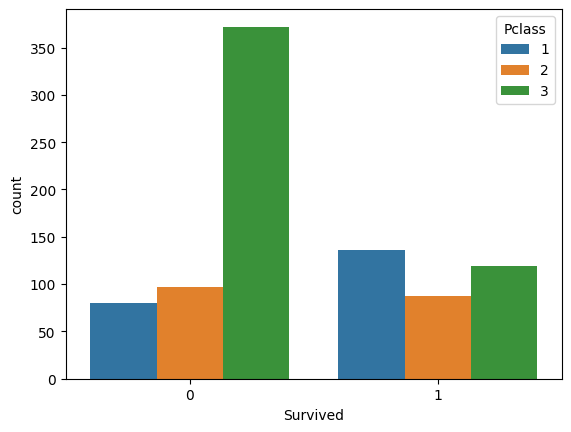

In [85]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x=df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


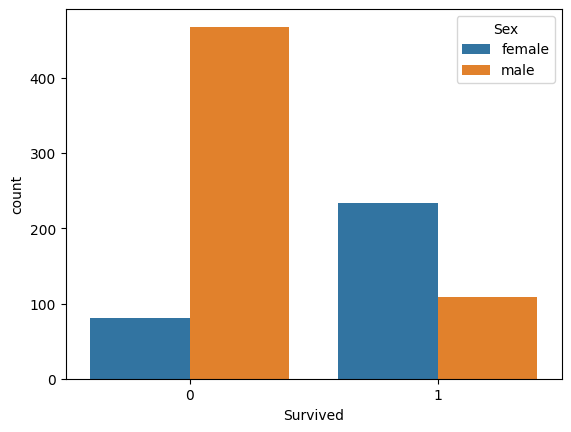

In [86]:
# Survival with sex

sns.countplot(x=df['Survived'], hue=df['Sex'])

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


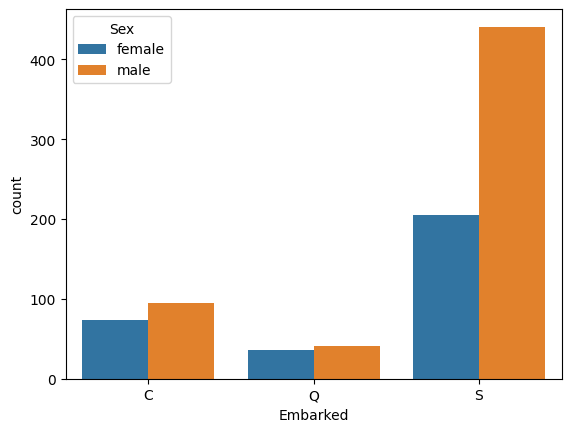

In [87]:
# Survival with Embarked

sns.countplot(x=df['Embarked'], hue=df['Sex'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)


<ipython-input-88-60cf10105d0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
<ipython-input-88-60cf10105d0e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

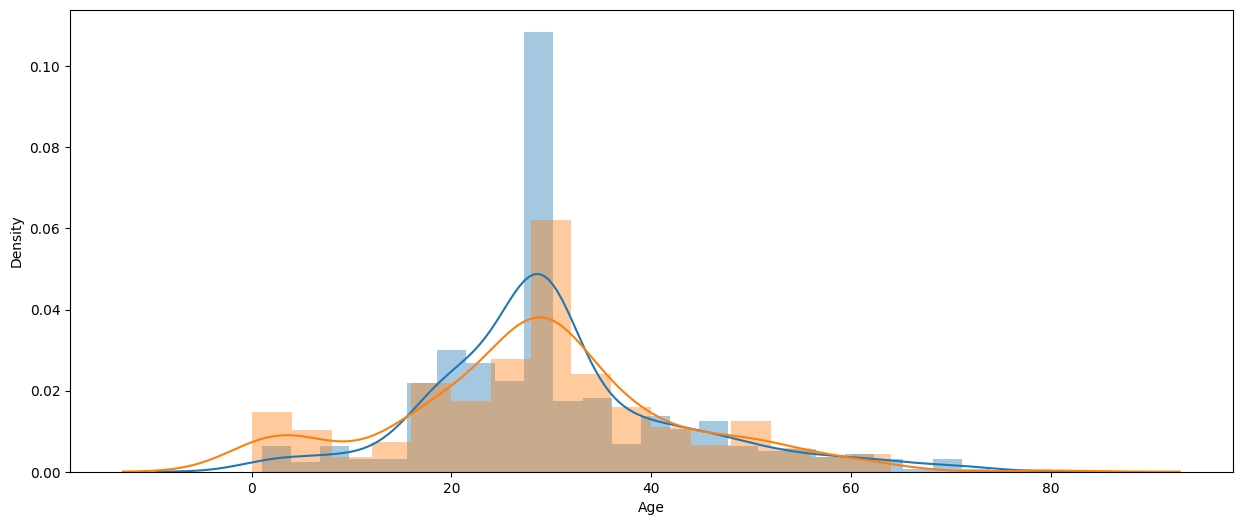

In [88]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<ipython-input-89-aa05b48b00f7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
<ipython-input-89-aa05b48b00f7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

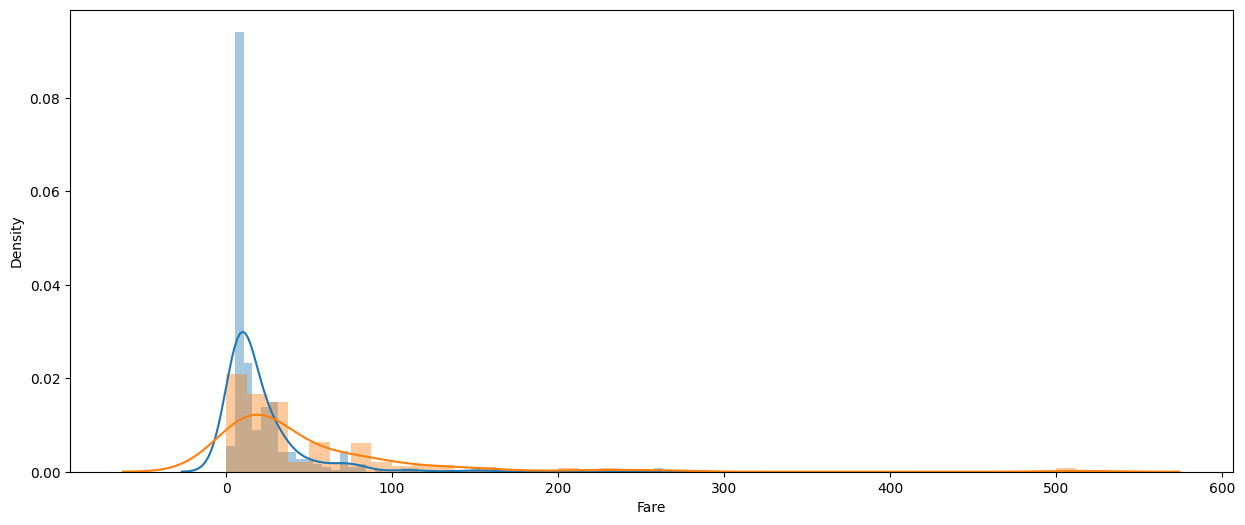

In [89]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])




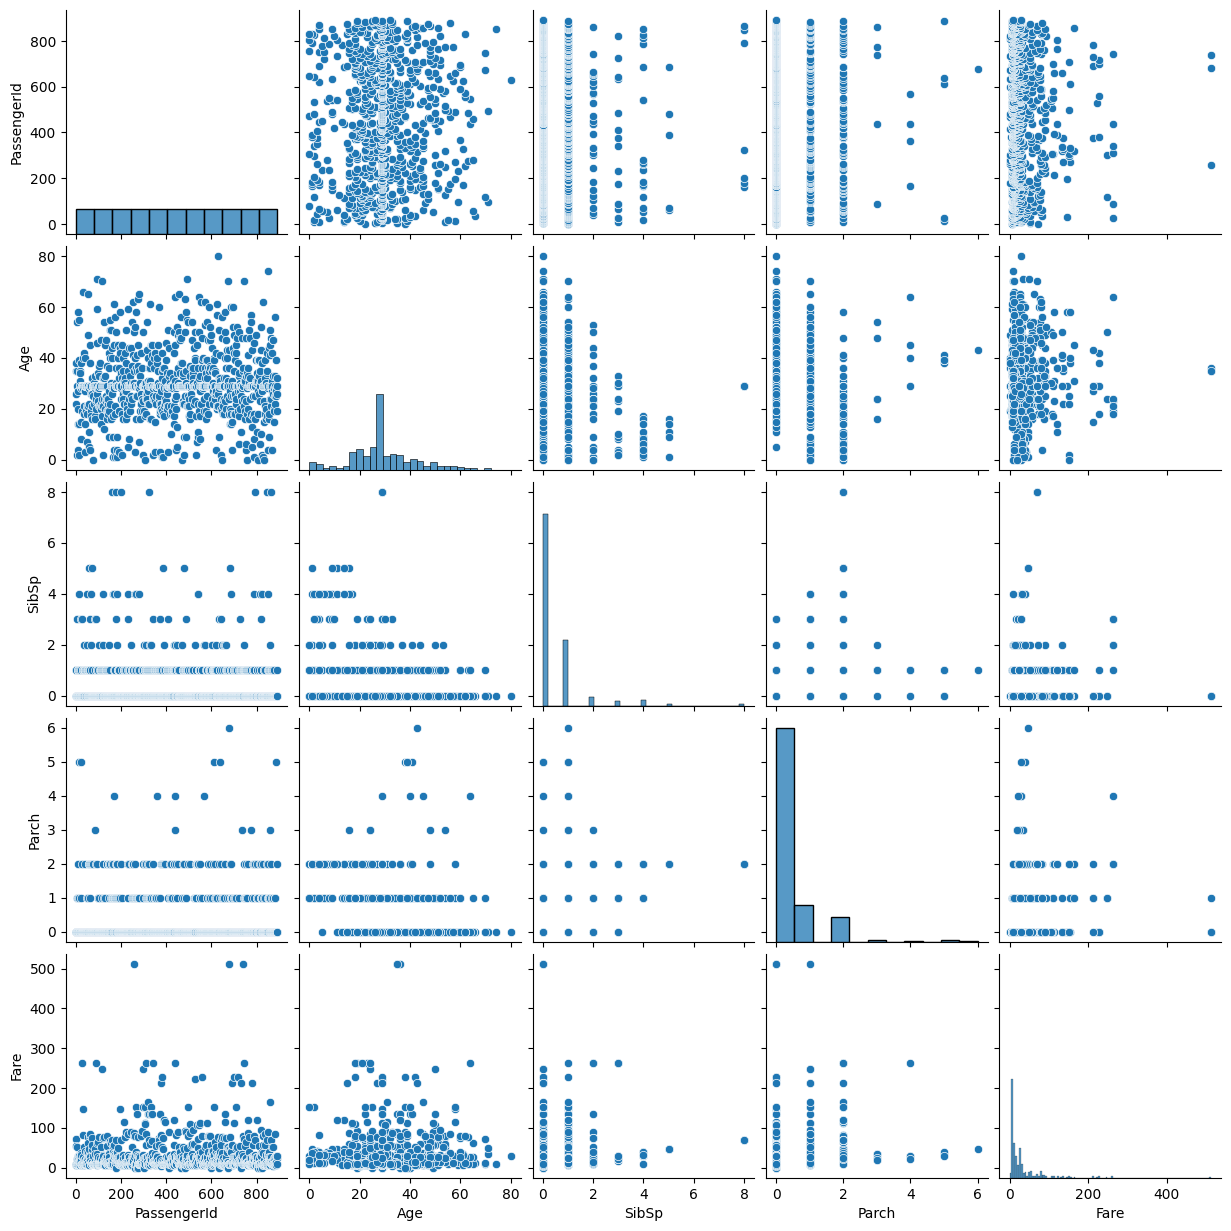

In [90]:
sns.pairplot(df)

<ipython-input-91-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

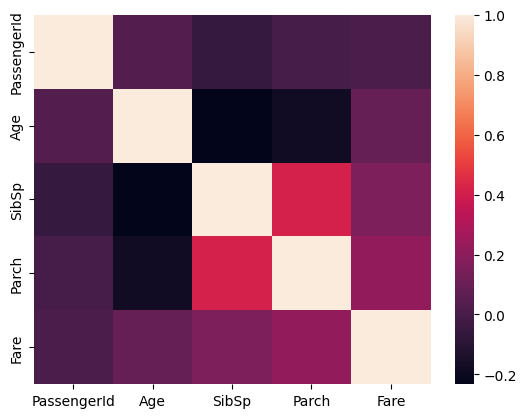

In [91]:
sns.heatmap(df.corr())

In [92]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size'] = df['Parch'] + df['SibSp']


In [93]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0000,S,0
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,345770,9.5000,S,0
214,215,0,3,"Kiernan, Mr. Philip",male,29,1,0,367229,7.7500,Q,1
739,740,0,3,"Nankoff, Mr. Minko",male,29,0,0,349218,7.8958,S,0
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,7.6500,S,0


In [94]:
# Now we will engineer a new featureby the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"


In [95]:
df['family_type']=df['family_size'].apply(family_type)

In [96]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
532,533,0,3,"Elias, Mr. Joseph Jr",male,17,1,1,2690,7.2292,C,2,Medium
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,9.3500,S,1,Medium
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.4750,S,1,Medium
280,281,0,3,"Duane, Mr. Frank",male,65,0,0,336439,7.7500,Q,0,Alone
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,11752,26.2833,S,2,Medium


In [97]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [98]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16,35851,7.7333,Q,Alone
407,408,1,2,"Richards, Master. William Rowe",male,3,29106,18.7500,S,Medium
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39,347082,31.2750,S,Large
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43,C 7075,6.4500,S,Alone
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,C.A. 2673,20.2500,S,Medium


In [99]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting outliers

1. Numerical Data
  *   if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
  *   if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

2. Categorical data
  *   f the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [100]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [101]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [102]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

# In this, pclass1 , sex_female and family_type_alobe has been removed bcuase of one hot encoding by using get dummies

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [103]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

# Drawing Conclusions
1. Chance of female survival is higher than male survival
2. Travelling in Pclass 3 was deadliest
Somehow, people going to C survived more
3. People in the age range of 20 to 40 had a higher chance of not surviving
4. People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone


In [ ]:
# Thankyou!!